In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# First view of train dataset
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Fata types of train dataset
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# Describe of train dataset
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Overview of test dataset
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Data types of test dataset
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# Describe of test dataset
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df = train_data

In [9]:
# Checking if the dataset is complete
check = df.count(axis=0)
print(check)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [10]:
# Checking the NA data
nan = df.isnull().sum(axis = 0)
print(nan)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# Quantity grouped by sex

df['Sex'].value_counts().to_frame()


,Sex
male,577
female,314


In [12]:
# Quantity grouped by embark location
df['Embarked'].value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


In [13]:
# Quantity grouped by survivors
df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [14]:
# Quantity grouped by class
df['Pclass'].value_counts().to_frame()

,Pclass
3,491
1,216
2,184


In [15]:
# Checking the correlation of specifics in the dataset
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [16]:
# show columns names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
# Transforming sex in dummy
dummy_sex = pd.get_dummies(df['Sex'])
dummy_sex.head()


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [18]:
# Transforming embark in dummy
dummy_embark = pd.get_dummies(df['Embarked'])
dummy_embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [19]:
# Transforming class in dummy

dummy_class = pd.get_dummies(df['Pclass'])
dummy_class.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [20]:
df_tratado = df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin']]

In [21]:
df_tratado.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN


In [22]:
df_tratado2 = pd.concat([df_tratado, dummy_embark, dummy_sex, dummy_class ], axis=1)

In [23]:
df_tratado2.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,female,male,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1


In [24]:
df_tratado2.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022148,-0.042939,0.042939,0.034303,-0.000086,-0.029486
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660,0.543351,-0.543351,0.285904,0.093349,-0.322308
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720,-0.131900,0.131900,-0.885924,-0.188432,0.916673
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523,-0.093254,0.093254,0.348941,0.006954,-0.312271
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,0.114631,-0.114631,-0.054582,-0.055932,0.092548
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,0.245489,-0.245489,-0.017633,-0.000734,0.015790
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,0.182333,-0.182333,0.591711,-0.118557,-0.413333
C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,0.082853,-0.082853,0.296423,-0.125416,-0.153329
Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,0.074115,-0.074115,-0.155342,-0.127301,0.237449
S,0.022148,-0.155660,0.081720,-0.032523,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000,-0.125722,0.125722,-0.170379,0.192061,-0.009511


In [25]:
df_tratado2.columns

Index(['PassengerId',    'Survived',      'Pclass',        'Name',
               'Age',       'SibSp',       'Parch',      'Ticket',
              'Fare',       'Cabin',           'C',           'Q',
                 'S',      'female',        'male',             1,
                   2,             3],
      dtype='object')

(0.0, 1.05)

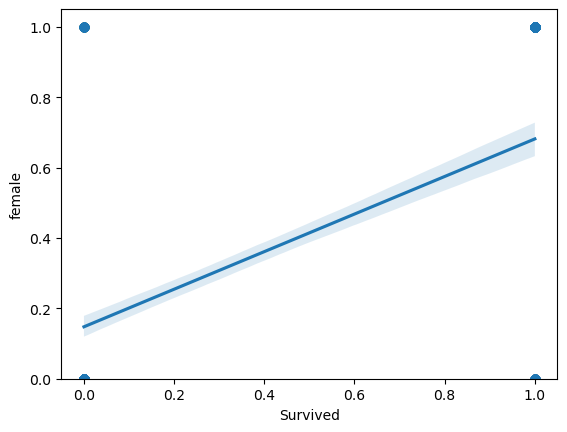

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.regplot(x="Survived", y="female", data=df_tratado2)
plt.ylim(0,)

In [27]:
# Checking the correlation of specifics items in the dataset
train_data[['Survived','Pclass','Age','Sex']].corr()

,Survived,Pclass,Age
Survived,1.000000,-0.338481,-0.077221
Pclass,-0.338481,1.000000,-0.369226
Age,-0.077221,-0.369226,1.000000
